In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import sigmaclip
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
full_data = pd.read_csv('cleaned_data.csv')
list(full_data.columns)

['batch',
 'id',
 'userAgent',
 'OS',
 'Browser',
 'isMobile',
 'studyCondition',
 'firstCondition',
 'seqAirline',
 'errorStates',
 'seqStates',
 'focusState',
 'focusAirline',
 'secondCondition',
 'errorAirline',
 'approx_airline_howManyCompare_0_answer',
 'approx_airline_howManyCompare_0_data',
 'approx_airline_howManyCompare_0_approx',
 'approx_airline_howManyCompare_0_confidence',
 'approx_airline_howMany_answer',
 'approx_airline_howMany_approx',
 'approx_airline_howMany_confidence',
 'approx_airline_howManyCompare_1_answer',
 'approx_airline_howManyCompare_1_data',
 'approx_airline_howManyCompare_1_approx',
 'approx_airline_howManyCompare_1_confidence',
 'approx_states_howManyCompare_0_answer',
 'approx_states_howManyCompare_0_data',
 'approx_states_howManyCompare_0_approx',
 'approx_states_howManyCompare_0_confidence',
 'approx_states_howMany_answer',
 'approx_states_howMany_approx',
 'approx_states_howMany_confidence',
 'approx_states_howManyCompare_1_answer',
 'approx_states_

In [4]:
results = ["87912012", "30619584", "51665387", "25917069", "50263296", "60755967", "2893057", "28653725", "76648162", "21045111", "72925790", "88825154", "97626871", "29657674", "26308857", "79273300", "77642132", "83205605", "9782123", "28428523", "95378753", "62759895", "45694489", "57315921", "20505415", "73348785", "77955785", "45840218", "79707421", "7321301", "43548417", "89431160", "29089701", "61154389", "71996586", "21418137", "76395409", "79544988", "76024785"]
results = set(map(int, results))
len(results)

39

In [5]:
only_valid = full_data[full_data['id'].isin(results)]
np.count_nonzero(only_valid['demographics_cheat'] != 'no')

5

In [6]:
data = only_valid[only_valid['demographics_cheat'] == 'no']
print(len(full_data), len(only_valid), len(data))

41 39 34


In [7]:
data['demographics_age'].describe()

count    34.000000
mean     33.735294
std       7.754994
min      21.000000
25%      28.000000
50%      30.500000
75%      40.750000
max      52.000000
Name: demographics_age, dtype: float64

In [8]:
data['demographics_gender'].value_counts()

male      26
female     8
Name: demographics_gender, dtype: int64

In [9]:
data['demographics_problems'].value_counts()

no                       9
none                     6
-                        4
No                       4
No technical problems    1
no technical problems    1
None.                    1
No problems.             1
No problems              1
"No, not at all."        1
None                     1
I had no problems.       1
No.                      1
No Problems              1
Name: demographics_problems, dtype: int64

In [10]:
data['demographics_improved'].value_counts()

-                                                                                                                                                                                                                 7
no                                                                                                                                                                                                                6
none                                                                                                                                                                                                              2
No it was fine as is.                                                                                                                                                                                             1
No                                                                                                                                                      

In [11]:
data['demographics_familiar'].value_counts(normalize=True)

familiar    0.352941
some        0.323529
expert      0.205882
none        0.117647
Name: demographics_familiar, dtype: float64

In [12]:
timing = data['timing_instructions_html'] + data['timing_approximate_first_html'] + data['timing_approximate_questions_first_html'] + data['timing_approximate_second_html'] + data['timing_approximate_questions_second_html'] + data['timing_precise_first_html'] + data['timing_precise_second_html'] + data['timing_precise_questions_html']
(timing/1000/60).describe()

count    31.000000
mean      8.333062
std       3.323316
min       4.368717
25%       6.092275
50%       6.816817
75%       9.883525
max      17.800067
dtype: float64

In [13]:
(data[['timing_instructions_html','timing_approximate_first_html','timing_approximate_questions_first_html','timing_approximate_second_html','timing_approximate_questions_second_html','timing_precise_first_html','timing_precise_second_html','timing_precise_questions_html']]/1000).describe()


,timing_instructions_html,timing_approximate_first_html,timing_approximate_questions_first_html,timing_approximate_second_html,timing_approximate_questions_second_html,timing_precise_first_html,timing_precise_second_html,timing_precise_questions_html
count,33.000000,34.000000,34.000000,34.000000,33.000000,34.000000,34.000000,32.000000
mean,35.977576,62.098059,49.408353,31.371412,44.645515,40.797529,23.784794,196.413156
std,31.585150,143.361751,29.604775,20.319874,31.668511,31.156400,11.754472,126.871974
min,1.187000,11.674000,21.317000,13.205000,16.657000,12.020000,11.370000,75.360000
25%,14.361000,24.156500,29.252250,17.972250,27.663000,21.018750,14.203250,122.957500
50%,31.807000,34.777500,41.758000,23.894000,36.402000,34.412000,20.135500,167.427500
75%,45.626000,48.520250,57.727750,36.131250,48.037000,47.960250,30.668750,213.720750
max,172.982000,866.229000,169.321000,106.682000,184.615000,174.680000,62.106000,606.329000


In [14]:
e = {}
clips = np.ones(2*len(data)) == 1

for y in ['approx', 'precise']:
    results = []
    for x in ['airline', 'states']:
        normalizer = data['{y}_{x}_howMany_{y}'.format(y=y, x=x)]
        a = abs((normalizer - data['{y}_{x}_howMany_answer'.format(y=y, x=x)]) / normalizer)
        results.append(a)
    
    d = np.array(pd.concat(results))
    
    c, low, upp = sigmaclip(d)
    
    clips = np.logical_and(np.logical_and(clips, d > low), d < upp)
    e[y] = d
    
    print(y)
    print(pd.DataFrame(c).describe())
    print(pd.DataFrame(c).mean())
    print(pd.DataFrame(c).std())

approx
               0
count  65.000000
mean    0.021821
std     0.035152
min     0.000000
25%     0.000000
50%     0.000000
75%     0.035088
max     0.160000
0    0.021821
dtype: float64
0    0.035152
dtype: float64
precise
               0
count  67.000000
mean    0.086727
std     0.130493
min     0.002543
25%     0.007128
50%     0.027397
75%     0.103217
max     0.559687
0    0.086727
dtype: float64
0    0.130493
dtype: float64


In [15]:
from scipy import stats

stats.ttest_ind(e['approx'][clips], e['precise'][clips])

Ttest_indResult(statistic=-3.8215166668697944, pvalue=0.00020731177858748215)

In [16]:
e = {}
clips = np.ones(2*len(data)) == 1

agg = pd.DataFrame()

for y in ['approx', 'precise']:
    results = []
    for x in ['airline', 'states']:
        for z in [0,1] if y == 'approx' else [0,1,2]:
            # the true difference, shold be >0 if the focus airline has more flights
            normalizer = data['{y}_{x}_howMany_{y}'.format(y=y, x=x)] - data['{y}_{x}_howManyCompare_{z}_{y}'.format(y=y, x=x, z=z)]
            a = abs((normalizer - data['{y}_{x}_howManyCompare_{z}_answer'.format(y=y, x=x, z=z)]) / normalizer)
            a[~np.isfinite(a)] = 0
            # a = a[np.isfinite(a)]
            results.append(a)
            agg['{}_{}_{}'.format(x, y,z)] = a
    d = pd.concat(results)
    
    c = d
    #c, low, upp = sigmaclip(d)
    
    e[y] = d
    
    #print(y)
    #print(pd.DataFrame(c).describe())
    #print('mean', pd.DataFrame(c).mean())
    #print('stdev', pd.DataFrame(c).std())

agg['airline_approx'] = (agg['airline_approx_0'] + agg['airline_approx_1'])/2
agg['states_approx'] = (agg['states_approx_0'] + agg['states_approx_1'])/2
agg['airline_precise'] = (agg['airline_precise_0'] + agg['airline_precise_1'] + agg['airline_precise_2'])/3
agg['states_precise'] = (agg['states_precise_0'] + agg['states_precise_1'] + agg['states_precise_2'])/3

approx = pd.concat([agg['airline_approx'], agg['states_approx']])
precise = pd.concat([agg['airline_precise'], agg['states_precise']])

In [17]:
stats.ttest_ind(approx, precise)

Ttest_indResult(statistic=-2.161090950303485, pvalue=0.032465975636376779)

In [22]:
timing = (data['timing_approximate_questions_second_html'] + data['timing_approximate_questions_first_html'] + data['timing_approximate_first_html'] + data['timing_approximate_second_html'] + data['timing_precise_first_html'] + data['timing_precise_second_html'] + data['timing_precise_questions_html'])/1000/60
timing.describe()

count    32.000000
mean      7.585847
std       3.270244
min       4.013650
25%       5.483900
50%       6.224625
75%       8.811400
max      17.560717
dtype: float64

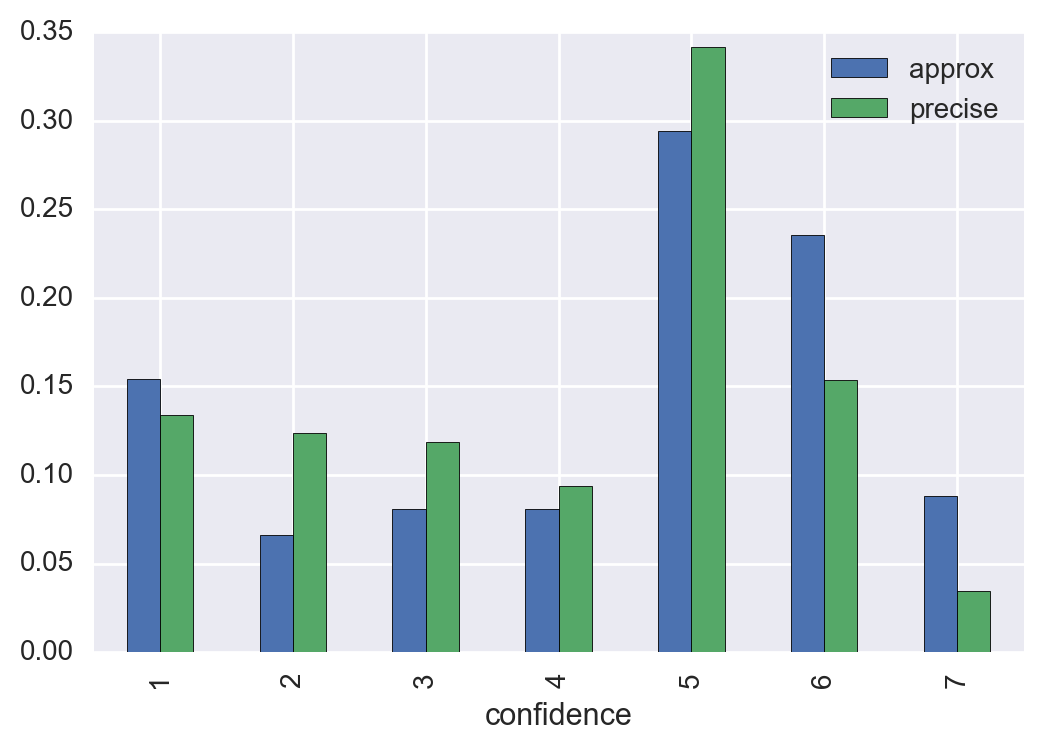

In [203]:
agg = pd.DataFrame()
for y in ['approx', 'precise']:
    for x in ['airline', 'states']:
        for z in [0,1] if y == 'approx' else [0,1,2]:
            field = '{y}_{x}_howManyCompare_{z}_confidence'.format(x=x, y=y, z=z)
            to_add = pd.DataFrame()
            to_add['confidence'] = data[field].replace({"unknown": 0, "strong_disagree": 1, "disagree": 2, "weak_disagree": 3, "neutral": 4, "weak_agree": 5, "agree": 6, "strong_agree": 7})
            to_add['condition'] = y
            to_add['which'] = x
            to_add['seq'] = z
            agg = pd.concat([agg, to_add])
agg = agg[agg['confidence'] > 0]
agg = agg.groupby(['condition'])

udf = pd.DataFrame()
df = pd.DataFrame()
for name, group in agg:
    gb = group.groupby(['confidence']).size()
    gb = gb.div(gb.sum())
    df[name] = gb
    
df.plot(kind='bar')

In [199]:
udf['approx']

confidence
1    21
2     9
3    11
4    11
5    40
6    32
7    12
Name: approx, dtype: int64

In [ ]:
stats.mannwhitneyu(udf['precise'], udf['approx'])